In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import time
from IPython.display import display, Latex

from torch.distributions.multivariate_normal import MultivariateNormal
from datetime import datetime

In [2]:
torch.set_default_dtype(torch.float64)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import time
from IPython.display import display, Latex

from torch.distributions.multivariate_normal import MultivariateNormal
from datetime import datetime

torch.set_default_dtype(torch.float64)# Create model of linear NN with L hidden layers
# input dim = d, hidden dim = m, output dim = k
class Linear_NN_varying_hidden_units(nn.Module):
    def __init__(self,d,m,k,L):
        """
            d: input dimension
            m: array of hidden layer dimensions of length L+1
            k: output dimension
            L: number of hidden layers
        """
        super().__init__()
        
        self.L = L
        self.lin_out = nn.Linear(m[-1], k, bias=False)
        self.lin_in = nn.Linear(d, m[0], bias=False)
        
        self.lin_hidden = nn.ModuleList()
        for i in range(self.L):
            self.lin_hidden.append(nn.Linear(m[i], m[i+1], bias=False))
#         self.lin_hidden = nn.ModuleList([nn.Linear(m, m, bias=False) for i in range(self.L)])
        
        
    def forward(self, xb):
        xb = self.lin_in(xb)
        
        for i in range(self.L):
            xb = self.lin_hidden[i](xb)
            
        xb = self.lin_out(xb)
        
        return xb
    
    def init_weights(self, init_type):
        if init_type == 'kaiming_normal':
            torch.nn.init.kaiming_normal_(self.lin_in.weight, nonlinearity='linear')
            torch.nn.init.kaiming_normal_(self.lin_out.weight, nonlinearity='linear')
            for i in range(self.L):
                torch.nn.init.kaiming_normal_(self.lin_hidden[i].weight, nonlinearity='linear')
        elif init_type == 'kaiming_uniform':
            torch.nn.init.kaiming_uniform_(self.lin_in.weight, nonlinearity='linear')
            torch.nn.init.kaiming_uniform_(self.lin_out.weight, nonlinearity='linear')
            for i in range(self.L):
                torch.nn.init.kaiming_uniform_(self.lin_hidden[i].weight, nonlinearity='linear')
        elif init_type == 'xavier_normal':
            torch.nn.init.xavier_normal_(self.lin_in.weight)
            torch.nn.init.xavier_normal_(self.lin_out.weight)
            for i in range(self.L):
                torch.nn.init.xavier_normal_(self.lin_hidden[i].weight)
        elif init_type == 'xavier_uniform':
            torch.nn.init.xavier_uniform_(self.lin_in.weight, nonlinearity='linear')
            torch.nn.init.xavier_uniform_(self.lin_out.weight, nonlinearity='linear')
            for i in range(self.L):
                torch.nn.init.xavier_uniform_(self.lin_hidden[i].weight, nonlinearity='linear')
        else:
            print('Unknown initialization. Using Kaiming normal initialization')
            torch.nn.init.kaiming_normal_(self.lin1.weight, nonlinearity='linear')
            torch.nn.init.kaiming_normal_(self.lin2.weight, nonlinearity='linear')
            for i in range(self.L):
                torch.nn.init.kaiming_normal_(self.lin_hidden[i].weight, nonlinearity='linear')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import time
from IPython.display import display, Latex

from torch.distributions.multivariate_normal import MultivariateNormal
from datetime import datetime

torch.set_default_dtype(torch.float64)# Create model of linear NN with L hidden layers
# input dim = d, hidden dim = m, output dim = k
class ReLU_NN_varying_hidden_units(nn.Module):
    def __init__(self,d,m,k,L):
        """
            d: input dimension
            m: array of hidden layer dimensions of length L+1
            k: output dimension
            L: number of hidden layers
        """
        super().__init__()
        
        self.L = L
        self.relu = nn.ReLU()
        self.lin_out = nn.Linear(m[-1], k, bias=False)
        self.lin_in = nn.Linear(d, m[0], bias=False)
        
        self.lin_hidden = nn.ModuleList()
        for i in range(self.L):
            self.lin_hidden.append(nn.Linear(m[i], m[i+1], bias=False))

        self.sequential = nn.Sequential(self.lin_in)
        
        for i in range(self.L):
            self.sequential.append(self.relu)
            self.sequential.append(self.lin_hidden[i])
        
        self.sequential.append(self.relu)
        self.sequential.append(self.lin_out)                
        
        
    def forward(self, xb):
        xb = self.sequential(xb)       
        return xb
    
    def init_weights(self, init_type):
        if init_type == 'kaiming_normal':
            torch.nn.init.kaiming_normal_(self.lin_in.weight, nonlinearity='linear')
            torch.nn.init.kaiming_normal_(self.lin_out.weight, nonlinearity='linear')
            for i in range(self.L):
                torch.nn.init.kaiming_normal_(self.lin_hidden[i].weight, nonlinearity='linear')
        elif init_type == 'kaiming_uniform':
            torch.nn.init.kaiming_uniform_(self.lin_in.weight, nonlinearity='linear')
            torch.nn.init.kaiming_uniform_(self.lin_out.weight, nonlinearity='linear')
            for i in range(self.L):
                torch.nn.init.kaiming_uniform_(self.lin_hidden[i].weight, nonlinearity='linear')
        elif init_type == 'xavier_normal':
            torch.nn.init.xavier_normal_(self.lin_in.weight)
            torch.nn.init.xavier_normal_(self.lin_out.weight)
            for i in range(self.L):
                torch.nn.init.xavier_normal_(self.lin_hidden[i].weight)
        elif init_type == 'xavier_uniform':
            torch.nn.init.xavier_uniform_(self.lin_in.weight, nonlinearity='linear')
            torch.nn.init.xavier_uniform_(self.lin_out.weight, nonlinearity='linear')
            for i in range(self.L):
                torch.nn.init.xavier_uniform_(self.lin_hidden[i].weight, nonlinearity='linear')
        else:
            print('Unknown initialization. Using Kaiming normal initialization')
            torch.nn.init.kaiming_normal_(self.lin1.weight, nonlinearity='linear')
            torch.nn.init.kaiming_normal_(self.lin2.weight, nonlinearity='linear')
            for i in range(self.L):
                torch.nn.init.kaiming_normal_(self.lin_hidden[i].weight, nonlinearity='linear')

In [5]:
L = [0]
d = 10
k = 10
m = [12]

Linear_NN = Linear_NN_varying_hidden_units(d,m,k,L[0])
ReLU_NN = ReLU_NN_varying_hidden_units(d,m,k,L[0])

num_param = sum(p.numel() for p in ReLU_NN.parameters())

In [6]:
num_param

240

In [7]:
cov_x = torch.eye(d)

# define multi-variate normal generator with unit matrix as variance
mvrn_d = MultivariateNormal(torch.zeros(d),cov_x)
mvrn_k = MultivariateNormal(torch.zeros(k),torch.eye(k))

torch.manual_seed(3141)

# sample n (input,output) tuples
n = 10000
x_data = (mvrn_d.rsample((n,)))**2
y_data = torch.clone(x_data)
# y = mvrn_k.rsample((n,))

# calculate the empirical input covariance matrix and its condition number
cov_xx = x_data.T @ x_data / n

H_cond_lin_init = []
H_o_tilde_cond_lin_init = []
H_spec_lin_init = []

H_cond_relu_init = []
H_spec_relu_init = []


torch.manual_seed(314159)

print('Network configurations: d = %d, k = %d, m = %d, L = %d ' %(d, k, m[0], L[0]))


# initialize the weight matrices according to the defined initialization
Linear_NN.init_weights('kaiming_normal')

V_kaiming = Linear_NN.lin_in.weight.detach()
W_kaiming = Linear_NN.lin_out.weight.detach()

# calculate the outer Hessian product according to the expression derived by Sidak
H_o_tilde_lin_init = torch.kron( W_kaiming @ W_kaiming.T, cov_xx ) + \
                torch.kron( torch.eye(k), V_kaiming.T @ V_kaiming @ cov_xx )
H_o_tilde_cond_lin_init.append(torch.linalg.cond(H_o_tilde_lin_init))

# calculate the prediction at initialization with kaiming or xavier initialization(no training)
y_hat_lin = Linear_NN(x_data)

# calculate the MSE given the prediction and the loss
loss_lin = ((y_hat_lin - y_data)**2).mean()

# Allocate Hessian size
H_lin_init = torch.zeros((num_param, num_param))

# Calculate Jacobian w.r.t. model parameters
J_lin = torch.autograd.grad(loss_lin, list(Linear_NN.parameters()), create_graph=True)
J_lin = torch.cat([e.flatten() for e in J_lin]) # flatten

# Fill in Hessian
for i in range(num_param):
    result = torch.autograd.grad(J_lin[i], list(Linear_NN.parameters()), retain_graph=True)
    H_lin_init[i] = torch.cat([r.flatten() for r in result]) # flatten

H_cond_lin_init.append(torch.linalg.cond(H_lin_init.detach()))
H_spec_lin_init += list(torch.linalg.eigvalsh(H_lin_init.detach()))




print('Calculations for ReLU networks')

torch.manual_seed(314159)

print('Network configurations: d = %d, k = %d, m = %d, L = %d ' %(d, k, m[0], L[0]))

# initialize the weight matrices according to the defined initialization
ReLU_NN.init_weights('kaiming_normal')

# calculate the prediction at initialization with kaiming or xavier initialization(no training)
y_hat_relu = ReLU_NN(x_data)

# calculate the MSE given the prediction and the loss
loss_relu = ((y_hat_relu - y_data)**2).mean()

# Allocate Hessian size
H_relu_init = torch.zeros((num_param, num_param))

# Calculate Jacobian w.r.t. model parameters
J_relu = torch.autograd.grad(loss_relu, list(ReLU_NN.parameters()), create_graph=True)
J_relu = torch.cat([e.flatten() for e in J_relu]) # flatten

# Fill in Hessian
for i in range(num_param):
    result = torch.autograd.grad(J_relu[i], list(ReLU_NN.parameters()), retain_graph=True)
    H_relu_init[i] = torch.cat([r.flatten() for r in result]) # flatten

H_cond_relu_init.append(torch.linalg.cond(H_relu_init.detach()))
H_spec_relu_init += list(torch.linalg.eigvalsh(H_relu_init.detach()))



Network configurations: d = 10, k = 10, m = 12, L = 0 
Calculations for ReLU networks
Network configurations: d = 10, k = 10, m = 12, L = 0 


In [8]:
display(Latex(f'$\kappa(H_{{lin}})$ =  {H_cond_lin_init[0]}'))
display(Latex(f'$\kappa(H_{{relu}})$ =  {H_cond_relu_init[0]}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [9]:
from torch import optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader


train_ds = TensorDataset(x_data, y_data)
train_dl = DataLoader(train_ds, batch_size=1)

loss_func = F.mse_loss

In [10]:
opt_lin = optim.SGD(Linear_NN.parameters(), lr=0.001)

epochs = 3
for epoch in range(epochs):
    for xb, yb in train_dl:
        pred = Linear_NN(xb)
        loss = loss_func(pred, yb)
        
        loss.backward()
        opt_lin.step()
        opt_lin.zero_grad()
        
    print(loss_func(Linear_NN(x_data), y_data))


tensor(0.0013, grad_fn=<MseLossBackward0>)
tensor(2.7392e-07, grad_fn=<MseLossBackward0>)
tensor(1.4872e-10, grad_fn=<MseLossBackward0>)


In [11]:
opt_relu = optim.SGD(ReLU_NN.parameters(), lr=0.001)

epochs = 5
for epoch in range(epochs):
    for xb, yb in train_dl:
        pred = ReLU_NN(xb)
        loss = loss_func(pred, yb)
        
        loss.backward()
        opt_relu.step()
        opt_relu.zero_grad()
        
    print(loss_func(ReLU_NN(x_data), y_data))

tensor(0.4420, grad_fn=<MseLossBackward0>)
tensor(0.0322, grad_fn=<MseLossBackward0>)
tensor(0.0092, grad_fn=<MseLossBackward0>)
tensor(0.0036, grad_fn=<MseLossBackward0>)
tensor(0.0016, grad_fn=<MseLossBackward0>)


In [12]:
H_cond_lin_trained = []
H_o_tilde_cond_lin_trained = []
H_spec_lin_trained = []

H_cond_relu_trained = []
H_spec_relu_trained = []


print('Network configurations: d = %d, k = %d, m = %d, L = %d ' %(d, k, m[0], L[0]))

V_kaiming = Linear_NN.lin_in.weight.detach()
W_kaiming = Linear_NN.lin_out.weight.detach()

# calculate the outer Hessian product according to the expression derived by Sidak
H_o_tilde_lin_trained = torch.kron( W_kaiming @ W_kaiming.T, cov_xx ) + \
                torch.kron( torch.eye(k), V_kaiming.T @ V_kaiming @ cov_xx )
H_o_tilde_cond_lin_trained.append(torch.linalg.cond(H_o_tilde_lin_trained))


# calculate the prediction at the end of training
y_hat_lin = Linear_NN(x_data)

# calculate the MSE given the prediction and the loss
loss_lin = ((y_hat_lin - y_data)**2).mean()

# Allocate Hessian size
H_lin_trained = torch.zeros((num_param, num_param))

# Calculate Jacobian w.r.t. model parameters
J_lin = torch.autograd.grad(loss_lin, list(Linear_NN.parameters()), create_graph=True)
J_lin = torch.cat([e.flatten() for e in J_lin]) # flatten

# Fill in Hessian
for i in range(num_param):
    result = torch.autograd.grad(J_lin[i], list(Linear_NN.parameters()), retain_graph=True)
    H_lin_trained[i] = torch.cat([r.flatten() for r in result]) # flatten

H_cond_lin_trained.append(torch.linalg.cond(H_lin_trained.detach()))
H_spec_lin_trained += list(torch.linalg.eigvalsh(H_lin_trained.detach()))




print('Calculations for ReLU networks')


# calculate the prediction at the end of training 
y_hat_relu = ReLU_NN(x_data)

# calculate the MSE given the prediction and the loss
loss_relu = ((y_hat_relu - y_data)**2).mean()

# Allocate Hessian size
H_relu_trained = torch.zeros((num_param, num_param))

# Calculate Jacobian w.r.t. model parameters
J_relu = torch.autograd.grad(loss_relu, list(ReLU_NN.parameters()), create_graph=True)
J_relu = torch.cat([e.flatten() for e in J_relu]) # flatten

# Fill in Hessian
for i in range(num_param):
    result = torch.autograd.grad(J_relu[i], list(ReLU_NN.parameters()), retain_graph=True)
    H_relu_trained[i] = torch.cat([r.flatten() for r in result]) # flatten

H_cond_relu_trained.append(torch.linalg.cond(H_relu_trained.detach()))
H_spec_relu_trained += list(torch.linalg.eigvalsh(H_relu_trained.detach()))



Network configurations: d = 10, k = 10, m = 12, L = 0 
Calculations for ReLU networks


In [13]:
display(Latex(f'$\kappa(H_{{lin}})$ =  {H_cond_lin_trained[0]}'))
display(Latex(f'$\kappa(H_{{relu}})$ =  {H_cond_relu_trained[0]}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
H_o_tilde_cond_lin_init, H_o_tilde_cond_lin_trained

([tensor(1329.3648)], [tensor(29.1906)])

Text(0.5, 0, '$\\lambda$')

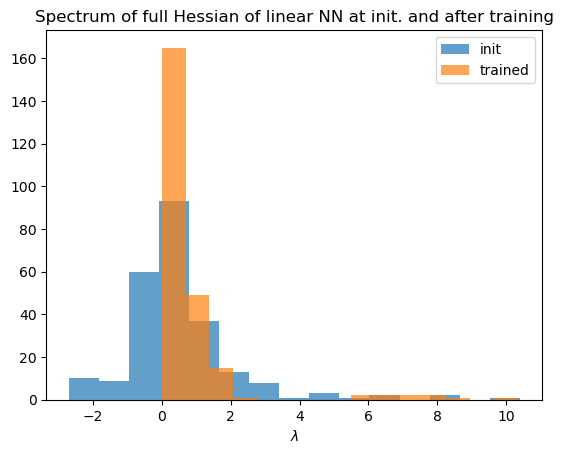

In [15]:
plt.title('Spectrum of full Hessian of linear NN at init. and after training')

plt.hist(np.linalg.eigvalsh(H_lin_init), alpha=0.7, bins=15, label='init')
plt.hist(np.linalg.eigvalsh(H_lin_trained), alpha=0.7, bins=15, label='trained')
plt.legend()

plt.xlabel('$\lambda$')

Text(0.5, 0, '$\\lambda$')

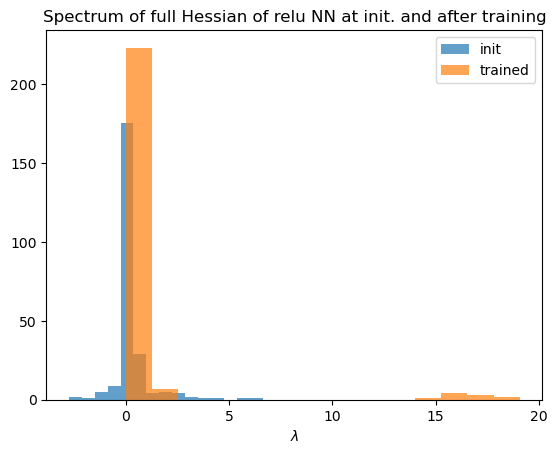

In [17]:
plt.title('Spectrum of full Hessian of relu NN at init. and after training')

plt.hist(np.linalg.eigvalsh(H_relu_init), alpha=0.7, bins=15, label='init')
plt.hist(np.linalg.eigvalsh(H_relu_trained), alpha=0.7, bins=15, label='trained')
plt.legend()

plt.xlabel('$\lambda$')

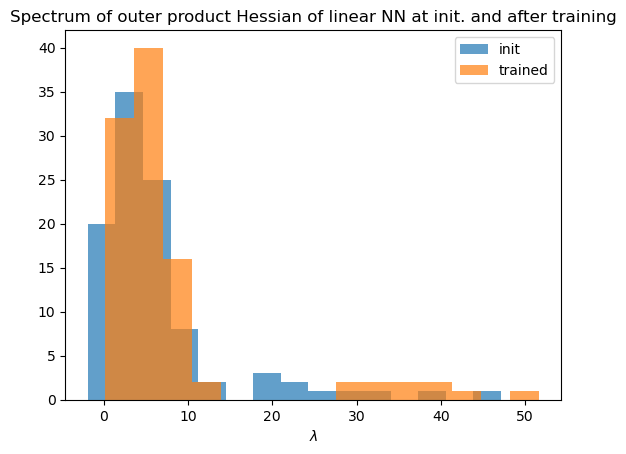

In [16]:
plt.title('Spectrum of outer product Hessian of linear NN at init. and after training')
plt.hist(np.linalg.eigvalsh(H_o_tilde_lin_init),alpha=0.7, bins=15, label='init')
plt.hist(np.linalg.eigvalsh(H_o_tilde_lin_trained),alpha=0.7, bins=15, label='trained')

plt.xlabel('$\lambda$')
plt.legend()

In [19]:
np.linalg.eigvalsh(H_relu_trained)[0]

-0.004317425128456785

In [26]:
len(np.linalg.eigvalsh(H_lin_trained))

240

In [28]:
np.linalg.cond(H_lin_trained)

4996492858290855.0

In [36]:
sorted_eval = np.sort((np.abs(np.linalg.eigvalsh(H_lin_trained))))

In [37]:
max(np.abs(np.linalg.eigvalsh(H_lin_trained)))/sorted_eval[17]

12599535890174.344

In [22]:
np.linalg.eigvalsh(H_lin_trained)

array([-9.99961183e-06, -8.22447798e-06, -4.10151105e-06, -3.35161138e-06,
       -3.32992199e-06, -3.30896310e-06, -3.28221059e-06, -3.21962538e-06,
       -3.07398624e-06, -3.01301002e-06, -2.83703363e-06, -1.02664844e-06,
       -8.65659578e-07, -5.22991815e-07, -3.95568650e-07, -3.94682953e-07,
       -3.92124360e-07, -3.85885914e-07, -3.67418044e-07, -3.50431781e-07,
       -2.99100454e-08, -2.45229164e-08, -2.25681125e-08, -1.71749852e-08,
       -1.29198434e-08, -1.28852729e-08, -1.26581142e-08, -1.19353680e-08,
       -3.98337731e-09, -3.61823567e-09, -2.66637048e-09, -2.35482022e-09,
       -2.29903563e-09, -2.10447526e-09, -1.60939221e-09, -1.40990955e-09,
       -9.68120431e-10, -9.14274753e-10, -7.80451502e-10, -6.77182191e-10,
       -4.85823489e-10, -2.69784906e-10, -2.37725536e-10, -1.32408394e-10,
       -1.18956724e-10, -8.29339342e-11, -6.43285199e-11, -5.45521271e-11,
       -4.37816602e-11, -3.87937965e-11, -1.64932579e-11, -1.47008631e-11,
       -8.45811353e-12, -

In [24]:
np.linalg.matrix_rank(H_lin_init)

240

In [25]:
np.linalg.matrix_rank(H_lin_trained)

223

In [23]:
np.linalg.eigvalsh(H_lin_init)

array([-2.69958870e+00, -2.66680320e+00, -2.62614273e+00, -2.58679077e+00,
       -2.51771475e+00, -2.41414733e+00, -2.35191219e+00, -2.27036859e+00,
       -2.12907567e+00, -1.86631521e+00, -1.73033995e+00, -1.53930339e+00,
       -1.06991313e+00, -1.06454463e+00, -1.05159047e+00, -1.02767584e+00,
       -1.01957080e+00, -1.00861496e+00, -9.57274788e-01, -9.44201454e-01,
       -8.79027052e-01, -8.44151624e-01, -8.04895504e-01, -6.25837999e-01,
       -6.03215654e-01, -5.97909486e-01, -5.77576645e-01, -5.70077941e-01,
       -5.29018489e-01, -5.01553010e-01, -4.93259236e-01, -4.61036172e-01,
       -4.46120942e-01, -4.38354913e-01, -4.27888062e-01, -4.10339228e-01,
       -3.97302943e-01, -3.92435215e-01, -3.87364030e-01, -3.85339601e-01,
       -3.81674876e-01, -3.70365898e-01, -3.67024084e-01, -3.63786778e-01,
       -3.58401359e-01, -3.50578250e-01, -3.45581746e-01, -3.42972876e-01,
       -3.39958287e-01, -3.36436325e-01, -3.30738389e-01, -3.25599896e-01,
       -3.21724646e-01, -